In [ ]:
import keras
from keras.layers import Dense,Flatten
from keras.models import Model
from tensorflow.keras import regularizers

In [ ]:
encoding_dim=500 #3072/30 will be the compression rate
input_img=keras.Input(shape=(32,32,3))
x=Flatten()(input_img)
encoded=Dense(encoding_dim,activation='relu')(x)
code=Dense(64,activation='relu')(encoded)
decoded=Dense(3072,activation='sigmoid')(code)
autoencoder=Model(x,decoded)



In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dense_1 (Dense)             (None, 64)                32064     
                                                                 
 dense_2 (Dense)             (None, 3072)              199680    
                                                                 
Total params: 1,768,244
Trainable params: 1,768,244
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.datasets import cifar10
(x_train,_),(x_test,_)=cifar10.load_data()


170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [ ]:
import numpy as np
print(np.prod(x_train.shape[1:]))

3072


In [ ]:
len(x_train)

50000

In [ ]:
x_train=x_train.reshape(len(x_train),np.prod(x_train.shape[1:]))

In [ ]:
x_train.shape

(50000, 3072)

In [ ]:
x_test=x_test.reshape(len(x_test),np.prod(x_test.shape[1:]))

In [ ]:
x_test.shape

(10000, 3072)

In [ ]:
autoencoder.compile(optimizer='adagrad',loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train,x_train,epochs=10,batch_size=300,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/10
167/167 [==============================] - 14s 82ms/step - loss: 0.5849 - val_loss: 0.5858
Epoch 2/10
167/167 [==============================] - 13s 80ms/step - loss: 0.5847 - val_loss: 0.5857
Epoch 3/10
167/167 [==============================] - 15s 90ms/step - loss: 0.5847 - val_loss: 0.5857
Epoch 4/10
167/167 [==============================] - 13s 78ms/step - loss: 0.5847 - val_loss: 0.5857
Epoch 5/10
167/167 [==============================] - 13s 77ms/step - loss: 0.5846 - val_loss: 0.5857
Epoch 6/10
167/167 [==============================] - 12s 74ms/step - loss: 0.5846 - val_loss: 0.5856
Epoch 7/10
167/167 [==============================] - 12s 74ms/step - loss: 0.5846 - val_loss: 0.5856
Epoch 8/10
167/167 [==============================] - 12s 74ms/step - loss: 0.5846 - val_loss: 0.5856
Epoch 9/10
167/167 [==============================] - 13s 78ms/step - loss: 0.5846 - val_loss: 0.5856
Epoch 10/10
167/167 [==============================] - 13s 76ms/step - loss: 0.584

In [ ]:
output=autoencoder.predict(x_test)


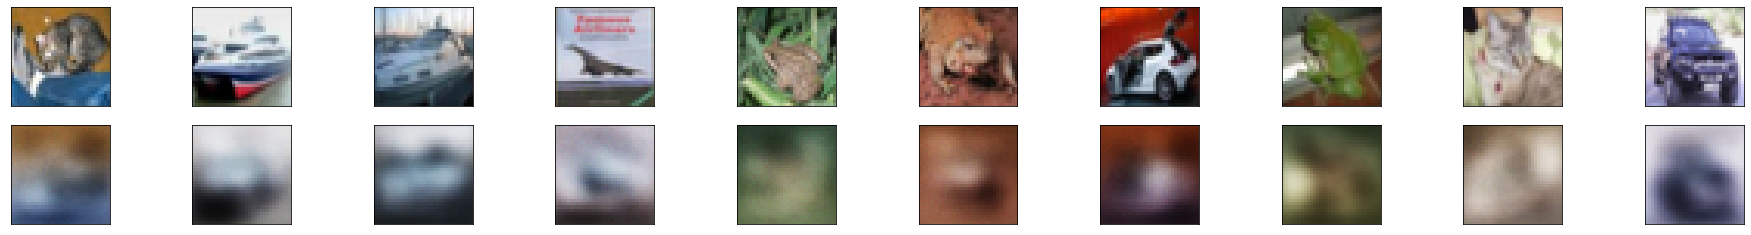

In [ ]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(32,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(32,32,3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax=plt.subplot(2,n,i+n+1)
  plt.imshow(output[i].reshape(32,32,3))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

